In [1]:
import MySQLdb
import numpy as np
import time
from Liveplot import LivePlotNotebook

In [2]:
class setInterval :
    def __init__(self,interval,action) :
        self.interval=interval
        self.action=action
        self.stopEvent=threading.Event()
        thread=threading.Thread(target=self.__setInterval)
        thread.start()

    def __setInterval(self) :
        nextTime=time.time()+self.interval
        while not self.stopEvent.wait(nextTime-time.time()) :
            nextTime+=self.interval
            self.action()

    def cancel(self) :
        self.stopEvent.set()

In [3]:
#Enter the values for you database connection
dsn_database = "ai_datasets"         # e.g. "MySQLdbtest"
dsn_hostname = "127.0.0.1"      # e.g.: "mydbinstance.xyz.us-east-1.rds.amazonaws.com"
dsn_port = 3306                  # e.g. 3306 
dsn_uid = "root"             # e.g. "user1"
dsn_pwd = ""              # e.g. "Password123"

conn = MySQLdb.connect(host=dsn_hostname, port=dsn_port, user=dsn_uid, passwd=dsn_pwd, db=dsn_database)
cursor = conn.cursor()

UnboundLocalError: local variable 'decisions' referenced before assignment

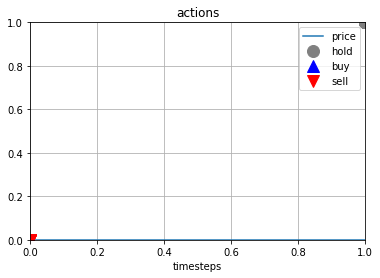

In [4]:
def get_data():
    cursor.execute ("select * from live_data order by date asc limit 1")
    return cursor.fetchall()

liveplot = LivePlotNotebook()
preds = np.array([])
decisions = np.array([])
    
def process_data():
    data = get_data()
    for obj in data:
        decisions = np.append(decisions, [int(obj[4])])
        preds = np.append(preds, [obj[0]])
    
    decisions = np.array([])
    preds = np.array([])
    
def show_graph():
    liveplot.update( x=preds, actions=decisions )
    
process_data()
show_graph()

setInterval(10, process_data())
setInterval(10, show_graph())
    # liveplot.update(x=, actions=decisions)
    


[ 1.]
[ 9762.97949219]


/home/thriven/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=9762.97949219, top=9762.97949219
  'bottom=%s, top=%s') % (bottom, top))


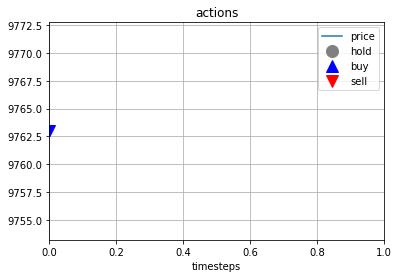

In [5]:
data = get_data()
liveplot = LivePlotNotebook()
for obj in data:
    decisions = np.append(decisions, [int(obj[4])])
    preds = np.append(preds, [obj[0]])

print decisions
print preds

liveplot.update( x=preds, actions=decisions )

decisions = np.array([])
preds = np.array([])